### Python week5 Home work (Matplotlib)

### Loading data in 

In [246]:
import pandas as pd
ride = pd.read_csv('ride_data_HW5.csv')
city = pd.read_csv('dash_price_HW5.csv')

In [247]:
ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [248]:
city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


### Getting a Summary table for Bubble Chart 

In [249]:
city_mean=pd.DataFrame(ride.groupby('city').mean()['fare'])

In [250]:
city_mean['total_rides']=pd.DataFrame(ride.groupby('city').count()['fare'])

In [251]:
city_mean['city']=city_mean.index

In [252]:
city_mean=city_mean.merge(city, on='city', how='inner')

In [253]:
city_mean.head()

,fare,total_rides,city,driver_count,type
0,23.928710,31,Alvarezhaven,21,Urban
1,20.609615,26,Alyssaberg,67,Urban
2,37.315556,9,Anitamouth,16,Suburban
3,23.625000,22,Antoniomouth,21,Urban
4,21.981579,19,Aprilchester,49,Urban


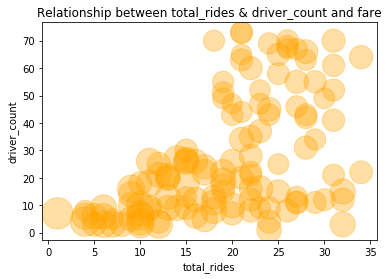

In [254]:
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = city_mean['total_rides']
y = city_mean['driver_count']
z = city_mean['fare']
 
# use the scatter function
plt.scatter(x, y, s=z*20, alpha=0.35,color='orange')
plt.xlabel('total_rides')
plt.ylabel('driver_count')
plt.title('Relationship between total_rides & driver_count and fare')
plt.show()


### Creating a summary table for pie charts 

In [255]:
Summary_city.head=pd.DataFrame({'Total_fare':city_mean.groupby('type').sum()['fare'],
                                'Total_rides':city_mean.groupby('type').count()['fare'],
                                'Total_drivers':city_mean.groupby('type').sum()['driver_count'],
})
Summary_city

,Total_drivers,Total_fare,Total_rides
type,,,
Rural,104,615.728572,18
Suburban,638,1300.433953,42
Urban,2607,1623.863390,66


### Total Fare by City Type

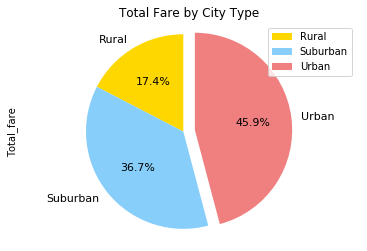

In [256]:
city_type=Summary_city.index

explode = (0, 0, 0.12) 

Summary_city.plot(kind='pie', y = 'Total_fare', autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=city_type,
legend = True, fontsize=11, colors=colors,explode=explode, title='Total Fare by City Type')
plt.axis("equal")
plt.show()

Urban riders takes up almost half of the Fares, followed by suburban then rural riders

### Total Rides by City Type

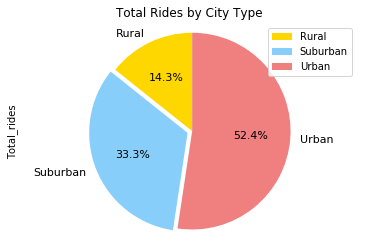

In [257]:
explode = (0, 0.05, 0) 

Summary_city.plot(kind='pie', y = 'Total_rides', autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=city_type,
legend = True, fontsize=11, colors=colors,explode=explode, title='Total Rides by City Type')
plt.axis("equal")
plt.show()

Urban riders rider more often than suburban and rural riders, this is proportional to total fares

### Total Drivers by City Type

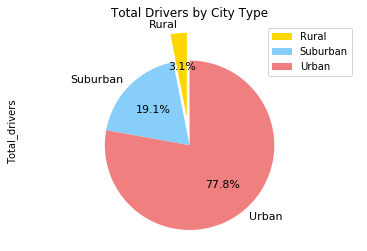

In [258]:
explode = (0.33, 0, 0) 

Summary_city.plot(kind='pie', y = 'Total_drivers', autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=city_type,
legend = True, fontsize=11, colors=colors,explode=explode, title='Total Drivers by City Type')

plt.axis("equal")
plt.show()

There are way more drivers in Urban area than in any other areas, the fact that this chart is not proportional to the previous charts indicates that the urban area is highly saturated, drivers might be struggling to make money because there are more drivers than needed.On the other hand the fact that rural area only has 3% of the toal drivers but is accouting for 17% of the revenue shows that there is opportunity for drivers to go to the rural area and make more money(if they are willing to) 